In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import fft
from PIL import Image

In [2]:
def img_convolve(pattern, img):
    img_fft = fft.fft2(img)
    pattern_fft = fft.fft2(pattern[::-1, ::-1], s=img.shape)
    return np.abs(fft.ifft2(img_fft * pattern_fft))

def color_invert(img):
    return img*(-1) + 255

def open_grayscale(img):
    img = Image.open(img).convert('L')
    return np.array(img)

def normalize(array):
    return 255 * (array / np.max(array))


In [4]:
def letter_recognition(pattern_name, img_name, eps=0.9, save_name=""):

    img = open_grayscale(img_name)
    img = color_invert(img)

    pattern = open_grayscale(pattern_name)
    pattern = color_invert(pattern)

    convolution = img_convolve(pattern, img)
    max_correlation = np.max(convolution)

    new_img = Image.open(img_name).convert('RGB')
    new_array = np.array(new_img)
    a, b = pattern.shape
    red = (255, 0, 0)

    for i, j in zip(*np.where(convolution > eps * max_correlation)):
        new_array[i:i-a:-1, j] = red
        new_array[i:i-a:-1, j - b] = red
        new_array[i, j:j-b:-1] = red
        new_array[i - a, j:j-b:-1] = red

    final_output = Image.fromarray(new_array)
    display(final_output)
    if save_name:
        final_output.save(save_name)


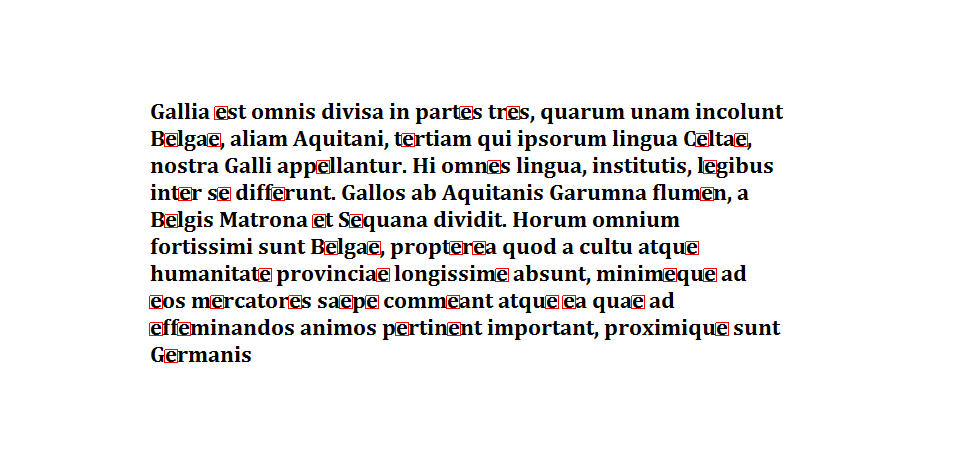

In [5]:
letter_recognition('galia_e.png', 'galia.png', save_name='letter_e.png')

In [ ]:
# pattern_recognition('fish1.png', 'school.jpg')